<a href="https://colab.research.google.com/github/shreyakarthik1210/salesDataAnalysis/blob/main/saleAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas

And now we can import this package like so:

In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
#df.head()
df.dropna(inplace=True)
df.describe() #Descritptive statistics of data

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [ ]:

totalItemsSold = 0  #Keeps track of the total number of items sold over the data set
totalPrice = 0         #Total amount of money spent by customers
avgUnitPrice = 0    #How much each item in the store costs on average
items = []
salePrices = []
unitPrice = []

salePrices = df.loc[:, "total"]
items = df.loc[:, "quantity"]
unitPrice = df.loc[:, "unit_price"]
for i in range (len(salePrices)):
  totalPrice+= salePrices[i]
  totalItemsSold+= items[i]
  avgUnitPrice+= unitPrice[i]
print(len(items))
#Calculating the averages related to how much money customers spend
avgUnitPrice = avgUnitPrice//len(unitPrice)
itemsSoldPerCustomer = totalItemsSold//len(items)
avgMoneySpendPerCustomer = totalPrice//len(salePrices)
print("Average Cost of one Item", avgUnitPrice)
print("Average number of items each customer bought", itemsSoldPerCustomer)
print("Average amount of money a customer spends", avgMoneySpendPerCustomer)

#print(df['category'].where(df['category'] == 'Vegetables'))
print("\nThis table represents the different categories of groceries and how much money and quantity there was for each")
types = df.groupby("category").sum()
print(types, "\n\n")


print(df.nlargest(3, "unit_price"))
print("\nThe purchase category with the most unit price are often medicine" + "\n\n")
print(df.nsmallest(3, "unit_price"))
print("\nThe purchase category with the least unit prices are often fruit")

7829
Average Cost of one Item 7.0
Average number of items each customer bought 2
Average amount of money a customer spends 19.0

This table represents the different categories of groceries and how much money and quantity there was for each
                       unit_price  quantity     total
category                                             
baby products             2751.96       543   6704.97
baked goods               3375.57      1089   8348.21
baking                    1410.36       648   3451.82
beverages                 3799.99       776   9930.64
canned foods              2702.09      1082   6743.48
cheese                    2534.97       783   6861.27
cleaning products         3738.38       725   9483.75
condiments and sauces     1246.49       450   3111.60
dairy                     2992.55       950   7551.60
frozen                    2648.77       660   6590.10
fruit                     2498.62      2439   6124.21
kitchen                   5768.58       955  14456.65
meat

<ipython-input-12-8e1ba52b507e>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  types = df.groupby("category").sum()


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

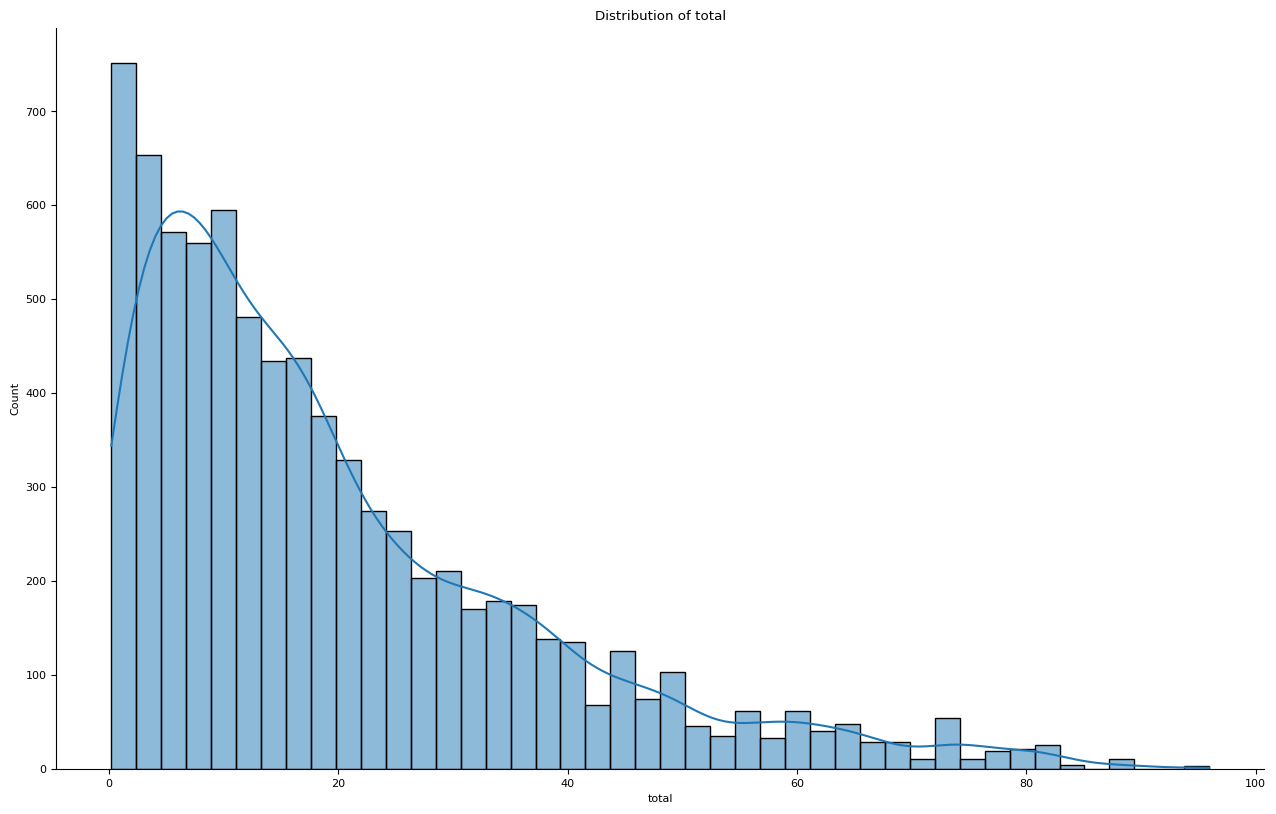

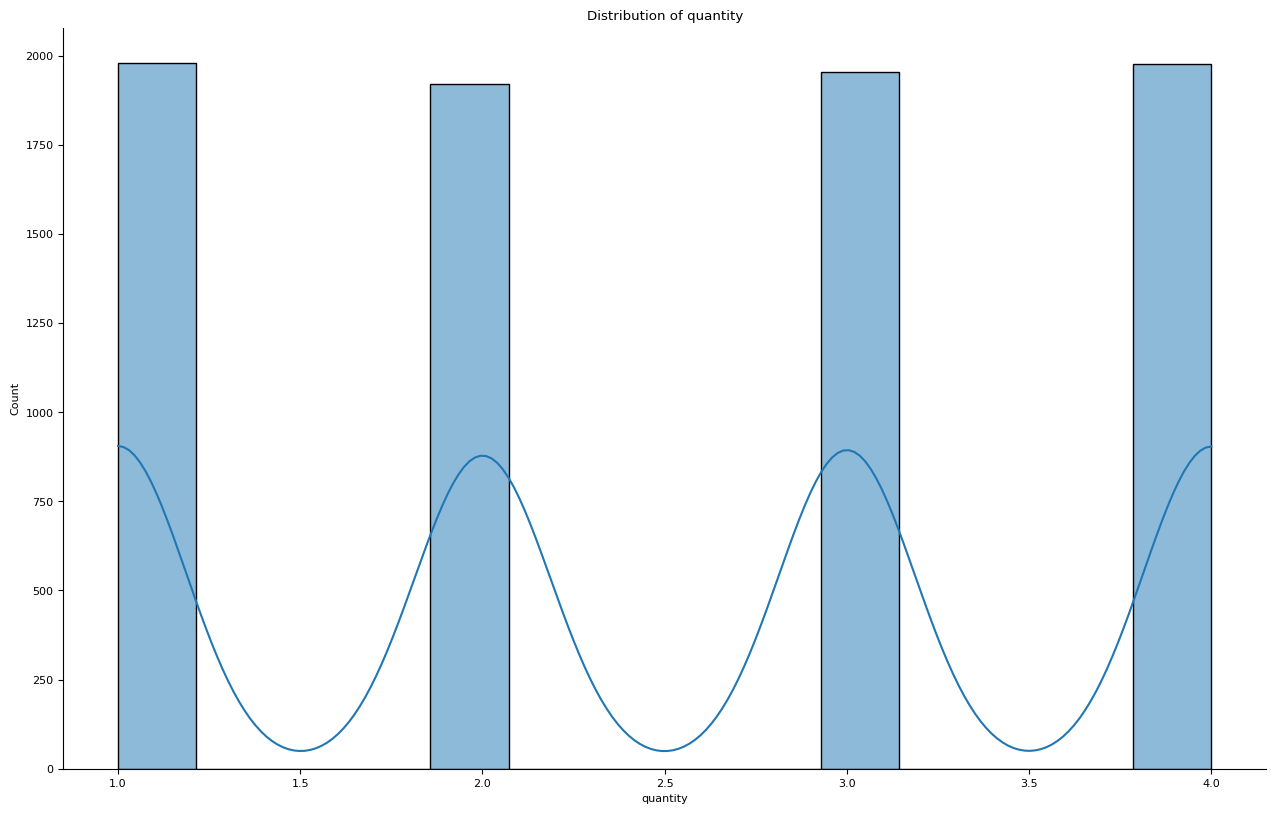

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

plot_continuous_distribution(df, "total") #Plots the distribution of the total prices
plot_continuous_distribution(df, "quantity") #Plots the distribution of quantities

In [ ]:
get_unique_values(df, "category") #Number of different items in categories
get_unique_values(df, "product_id") #Number of each item and how often it was sold

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64
Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                

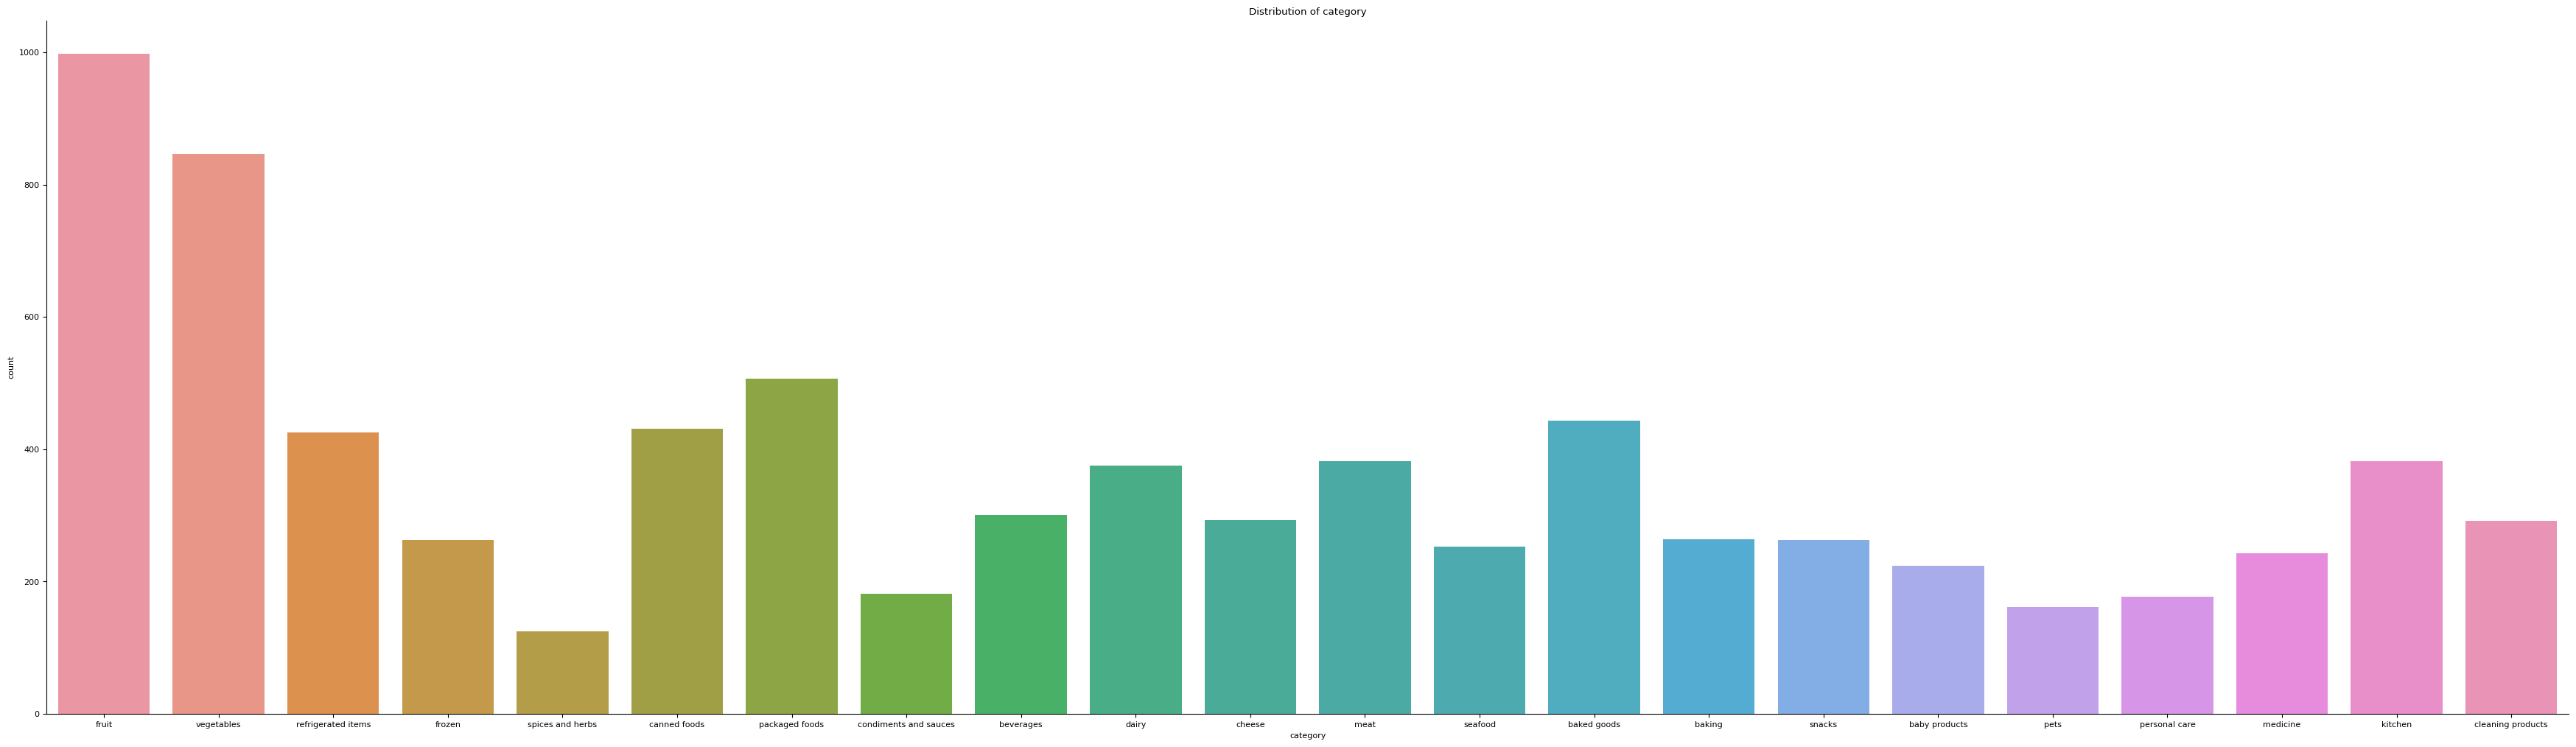

In [ ]:
plot_categorical_distribution(df, 'category', height=10, aspect=3.5)

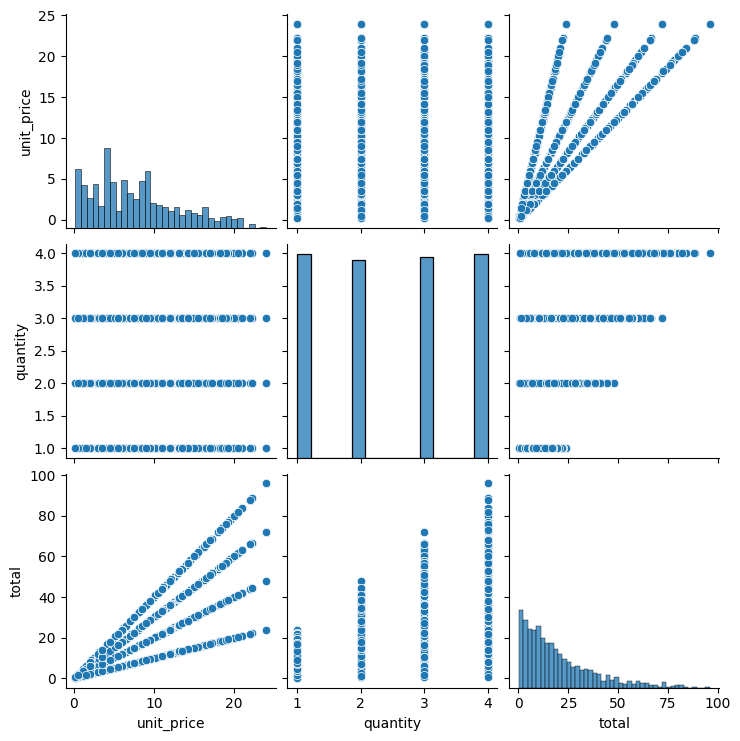

In [ ]:
sns.pairplot(df)

<Axes: xlabel='category', ylabel='total'>

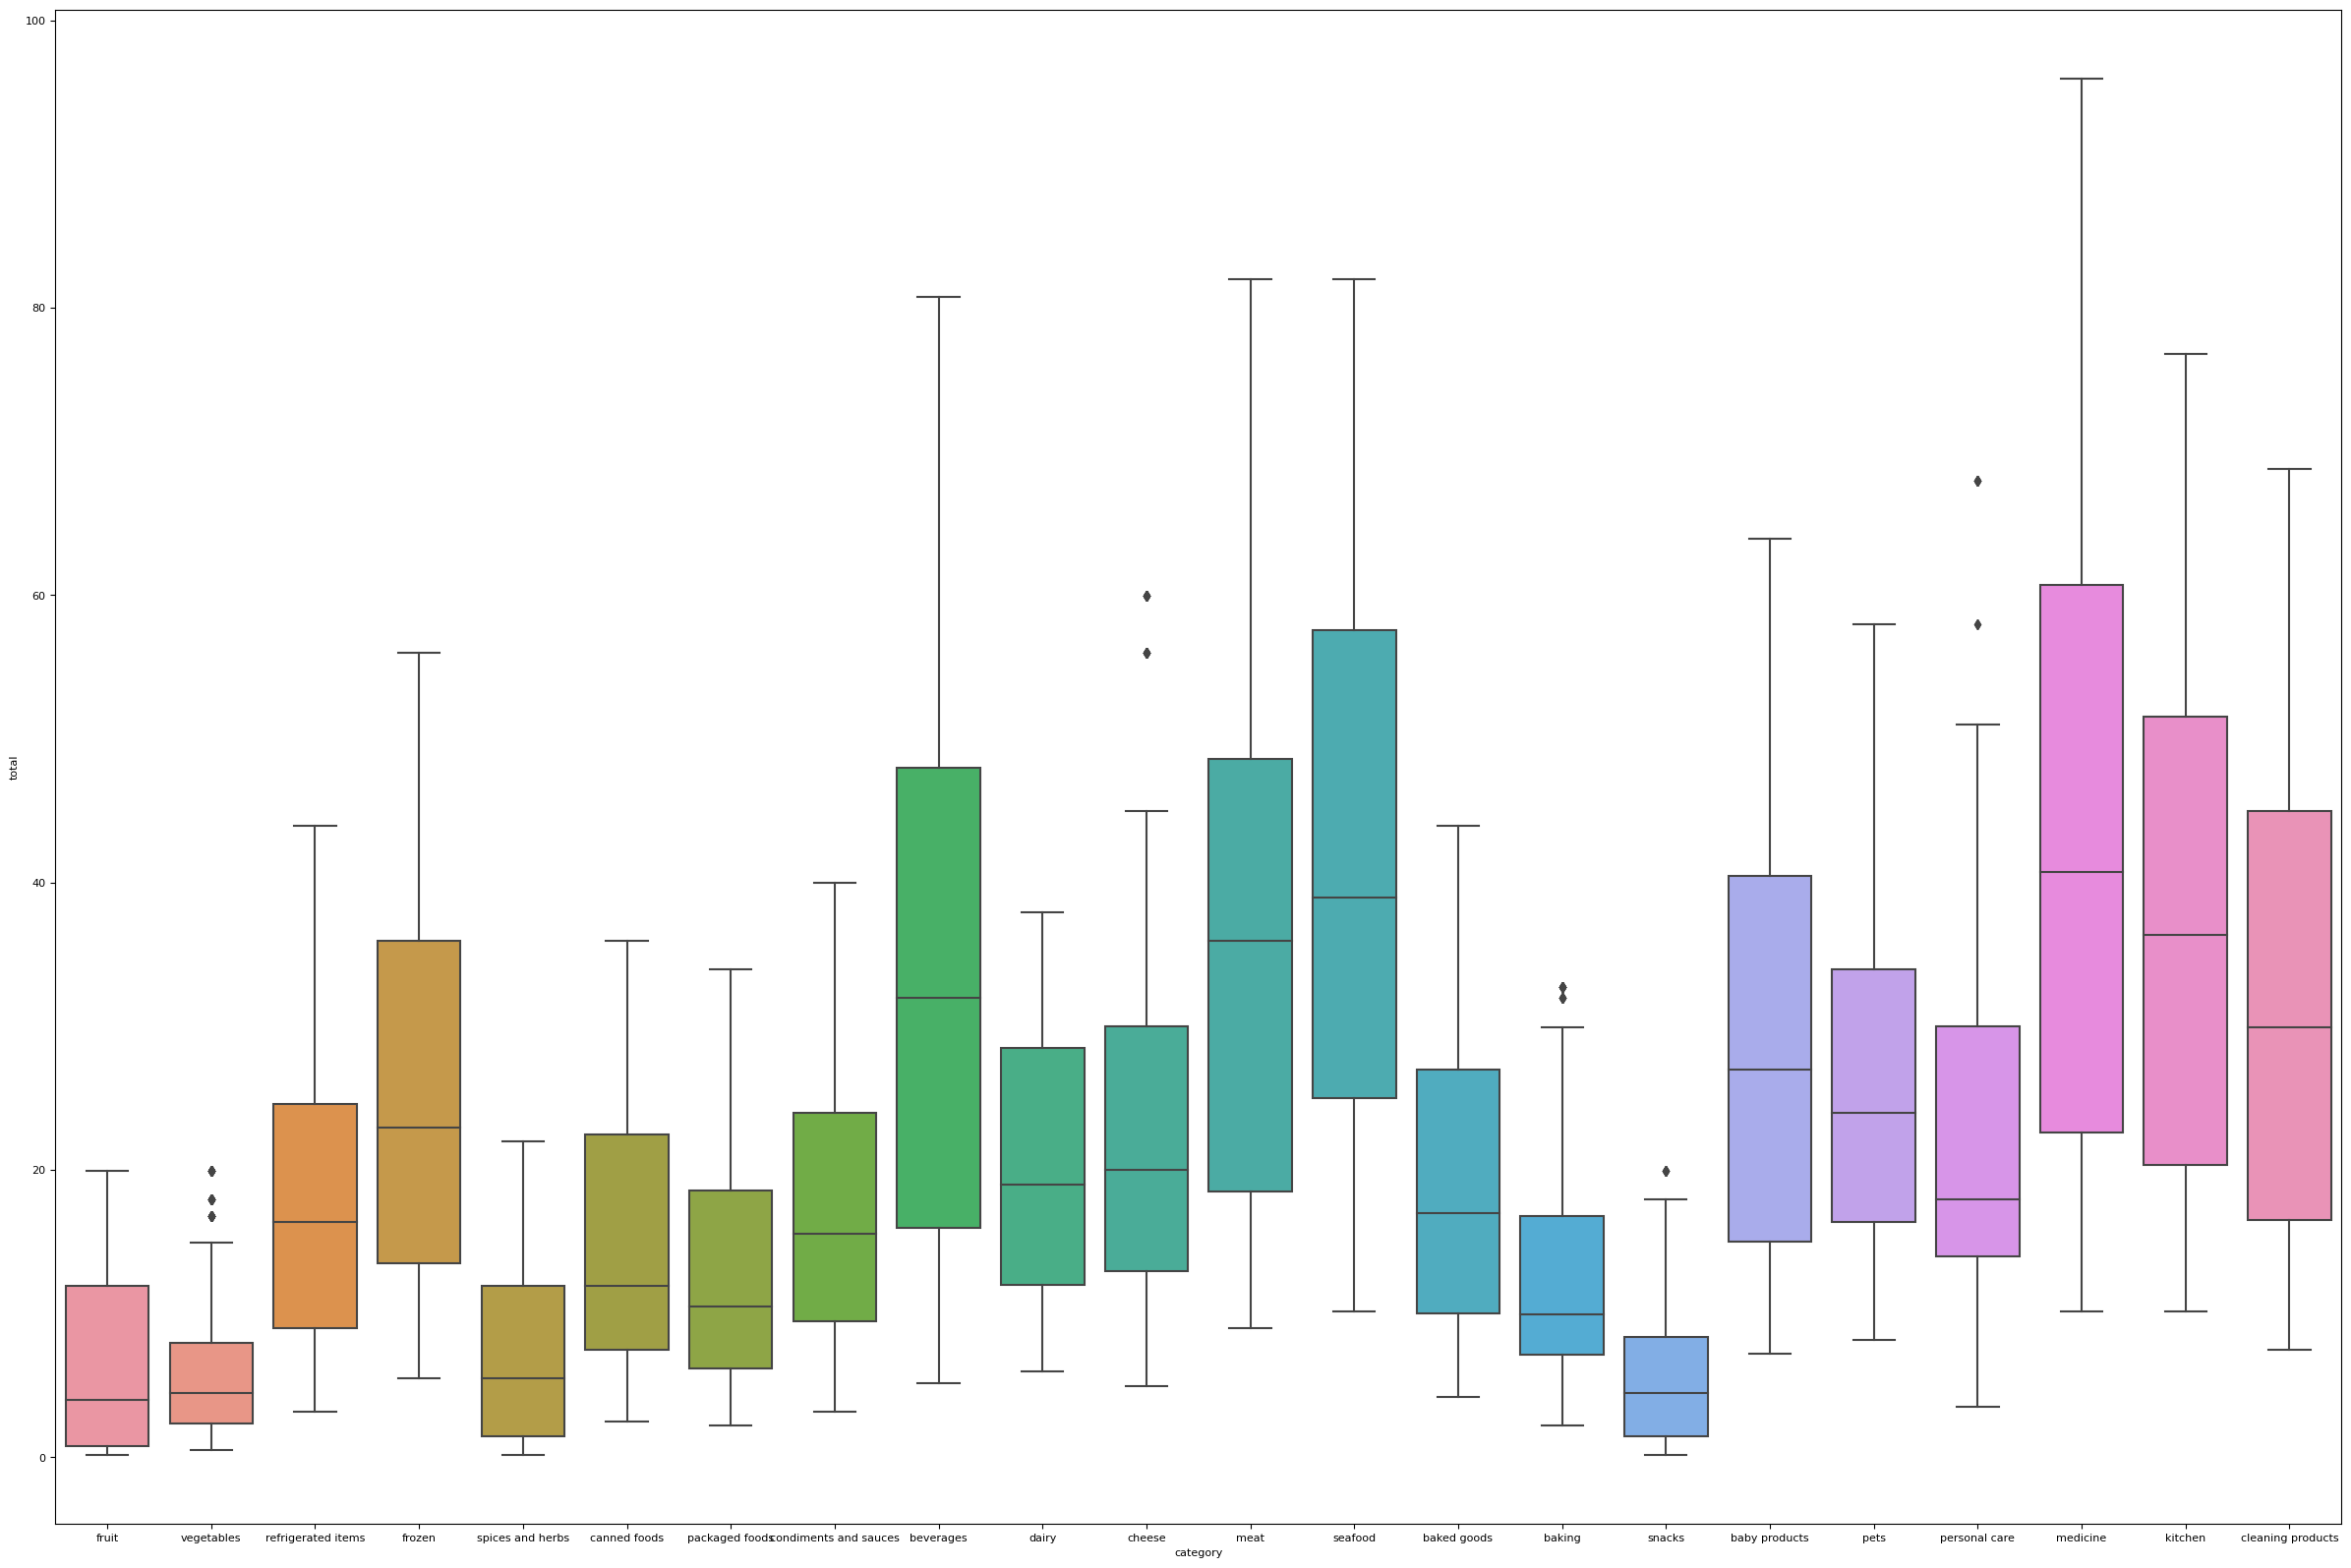

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(1, 1, figsize=(30, 20))
sns.boxplot(x='category', y='total', data=df)


In [ ]:
corr = df.corr()
print("This graph shows that there is a strong positive correlation between:\n1. The unit price and the total\n2. The number of items bought and the total")
corr.style.background_gradient(cmap='YlGn')


This graph shows that there is a strong positive correlation between:
1. The unit price and the total
2. The number of items bought and the total


<ipython-input-55-55b870abff5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


In [ ]:
df = convert_to_datetime(df, 'timestamp')
df['hour'] = df['timestamp'].dt.hour
get_unique_values(df, 'hour')
print("The busiest hours of the day are just before lunchtime and in the evening times, so a restock should happen before then ")

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64
The busiest hours of the day are just before lunchtime and in the evening times, so a restock should happen before then 
